Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**DFT/DTFT and Windowing for Superposition of 2 Complex Exponential Signals**,
Winter Semester 2020/21 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

# DTFT for Windowing

The signal $x[k]$ over time index $k$ is being windowed by $w[k]$, for which the corresponding **circular convolution** holds in DTFT domain

\begin{equation}
x[k] \cdot w[k] \circ-\bullet \frac{1}{2\pi} X(\Omega) \circledast_{2\pi} W(\Omega)
\end{equation}

Typically for the window function we choose non-zero values in $w[k]$ for $0 \leq k \leq N-1$ and $w[k]=0$ elsewhere.

Thus, we deal with a length $N$ signal that is non-zero at $0 \leq k \leq N-1$.
We can apply an $N$ DFT onto this signal $x_w[k] = x[0 \leq k \leq N-1] \cdot w[0 \leq k \leq N-1]$ to obtain its DFT spectrum $X_w[\mu]$ with the baseband $0\leq\mu\leq N-1$.

We are allowed to interpolate the DTFT spectrum from the DFT spectrum, (only) if we assume that $x_w[k]$ is a single occurring sequence, but is not periodic in $N$.

## Special Case: Complex Exponential

For a certain frequency $\Omega_1$ we can invent a simple complex exponential signal

\begin{equation}
x_1[k] = \mathrm{e}^{+\mathrm{j} \Omega_1 k} \circ-\bullet \bot\bot\bot (\frac{\Omega-\Omega_1}{2\pi})
\end{equation}

For certain window / DFT length $N$, the $\Omega_1 = \frac{2\pi}{N} \cdot \mu$ for $0\leq\mu\leq N-1$ correspond to the DFT eigenfrequencies in the spectrum baseband. On the other hand, if $\mu$ is rather non-integer, the frequency is between two DFT eigenfrequencies.

Since the complex exponential signal exhibits a Dirac comb in DTFT domain, the above circular convolution for the windowing process is very convenient to discuss:

The Dirac is the neutral element of the convolution.
Thus, to analyze the spectrum of $x_1[k]$ (actually its windowed part) we just need to interpret the DTFT spectrum $W(\Omega-\Omega_1)$, i.e. the window spectrum that is circular shifted along frequency axis.

## Special Case: Superposition of Two Complex Exponentials

In case of two complex exponentials

\begin{equation}
x_1[k] = \mathrm{e}^{+\mathrm{j} \Omega_1 k} \circ-\bullet \bot\bot\bot (\frac{\Omega-\Omega_1}{2\pi})
\end{equation}

\begin{equation}
x_2[k] = \mathrm{e}^{+\mathrm{j} \Omega_2 k} \circ-\bullet \bot\bot\bot (\frac{\Omega-\Omega_2}{2\pi})
\end{equation}

the superposition of these signals and windowing yields

\begin{equation}
w[k] \cdot (x_1[k] + x_2[k]) \circ-\bullet W(\Omega-\Omega_1) + W(\Omega-\Omega_2)
\end{equation}

To discuss the spectral characteristics of $x_1[k] + x_2[k]$ we need to interpret the **complex-valued** superposition
of the two spectra $W(\Omega-\Omega_1)$ and $W(\Omega-\Omega_2)$.
If we can handle this simple case, we have a better understanding for real world signal applications.

First, let's define a convenient plotting routine.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
#from scipy.fft import fft, ifft, fftshift
from scipy.signal.windows import kaiser


def plot_dft_dtft():  # TBD: proper scaling between DFT and DTFT !!!
    X1, X2 = fft(x1), fft(x2)
    x = x1 + x2
    X = fft(x)  # == fft(x1) + fft(x2) due to linearity

    # zeropadding to obtain a DTFT-like frequency resolution:
    Nz = 2**4 * N  # appropriate higher resolution such that curves are smooth
    muz = np.arange(Nz)
    x1z, x2z = np.zeros(Nz, dtype='complex'), np.zeros(Nz, dtype='complex')
    x1z[0:N], x2z[0:N] = x1, x2
    X1z, X2z = fft(x1z), fft(x2z)
    xz = x1z + x2z
    Xz = fft(xz)

    plt.figure(figsize=(6, 6))
    plt.subplot(2, 1, 1)
    plt.stem(mu, np.abs(X1), basefmt='C0:', linefmt='C0:', markerfmt='C0o',
             label=r'DFT $|X_1[\mu]|$')
    plt.stem(mu, np.abs(X2), basefmt='C1:', linefmt='C1:', markerfmt='C1o',
             label=r'DFT $|X_2[\mu]|$')
    plt.plot(muz / Nz * N, np.abs(X1z), 'C0',
             label=r'DTFT $|X_1(\Omega)|$')
    plt.plot(muz / Nz * N, np.abs(X2z), 'C1',
             label=r'DTFT $|X_2(\Omega)|$')

    plt.xlim(0, N)
    plt.xlabel(r'DFT frequency index $\mu$')
    plt.ylabel(r'Magnitude (also absolute value)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.stem(mu / N * 2 * np.pi, np.abs(X),
             basefmt='C0:', linefmt='C0:', markerfmt='C0o',
             label=r'DFT $|X_1[\mu]+X_2[\mu]|$')
    plt.plot(muz / Nz * 2 * np.pi, np.abs(Xz), 'C0',
             label=r'DTFT $|X_1(\Omega) + X_2(\Omega)|$')
    # due to linearity of convolution and Fourier transforms the same results
    # are obtained via:
    plt.stem(mu / N * 2 * np.pi, np.abs(X1+X2),
             basefmt='C7:', linefmt='C7:', markerfmt='C7.')
    plt.plot(muz / Nz * 2 * np.pi, np.abs(X1z+X2z), 'C7:')

    plt.xlim(0, 2*np.pi)
    plt.xlabel(r'DTFT frequency $\Omega$')
    plt.ylabel(r'Magnitude (also modulus)')
    plt.legend()
    plt.grid(True)

Then, we should define a certain (rather small) DFT length $N$. 

In [2]:
# signal & DFT parameter
N = 2**4
k, mu = np.arange(N), np.arange(N)

Note that the scaling of DTFT is aligned to the DFT data for better visual cues.
We should clarify this even more in future.

In the upcoming examples, we always have two plots
- the upper graph over DFT frequency index $\mu$ shows the two magnitude DTFT spectra of $W(\Omega-\Omega_1)$, $W(\Omega-\Omega_2)$ and there corresponding DFT spectra (dots)
- the lower plots over DTFT frequency $\Omega$ shows the DTFT / DFT spectrum of the signal / spectrum superposition

Thus, in the upper plot we see how two Dirac impulses are smeared by the window spectrum. We can study the characteristics of
- the so called mainlobe (the shape around the spectrum's maximum) and
- the so called sidelobes (the shapes that are followed by the mainlobe)
- number of zeros (for optimum windows we have $N-1$ zeros in the DTFT spectrum). Note that $\Omega=0=2\pi$ is the same zero, due to periodicity.
- number of non-zeros coefficients in DFT

In the lower plot we see how the superposition of the two signals affects the resulting spectrum.
- Do we obtain a separate mainlobes for the two frequencies?
- Or do we obtain a rather broad single mainlobe, not able to tell that the signal is built from two frequencies?
- Do we have zeros in the spectrum?
- How about the sidelobe magnitude and the decay of the sidelobes?

# Rectangular Window

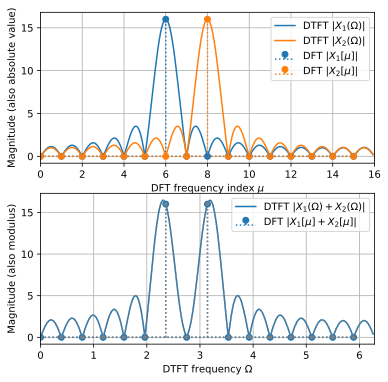

In [3]:
# superposition of 2 complex exponential signals
mu1, mu2 = 6, 8  # we choose two DFT eigenfrequencies here
x1, x2 = 1*np.exp(1j * 2*np.pi/N * k*mu1), 1*np.exp(1j * 2*np.pi/N * k*mu2)
plot_dft_dtft()  # we see two separate main lobes
# the rectangular window has most narrow mainlobe width but at the price of
# highest sidelobes amplitude and slow(est?) sidelobe decay

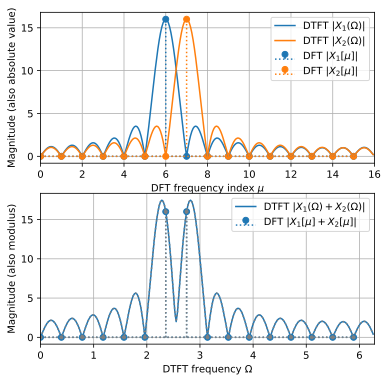

In [4]:
# superposition of 2 complex exponential signals
mu1, mu2 = 6, 7
x1, x2 = 1*np.exp(1j * 2*np.pi/N * k*mu1), 1*np.exp(1j * 2*np.pi/N * k*mu2)
plot_dft_dtft()  # we still see two separate main lobes
# mainlobes are now direct neighbours w.r.t. the DFT bins
# maximum of X1[mu] corresponds to a zero in X2[mu] and vice versa

# What happens if we put these signal frequencies even closer?
# Let's have a look at the next plot.

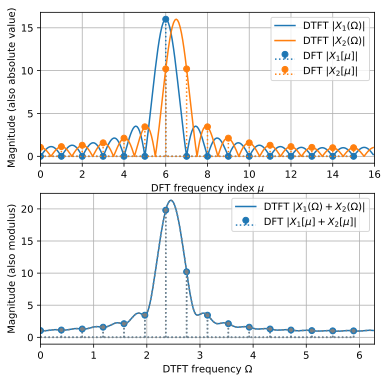

In [5]:
# superposition of 2 complex exponential signals
mu1, mu2 = 6, 6.5
x1, x2 = 1*np.exp(1j * 2*np.pi/N * k*mu1), 1*np.exp(1j * 2*np.pi/N * k*mu2)
plot_dft_dtft()  # the two signal frequencies cannot longer clearly
# detected, since # their individual spectra smear into one single main lobe

# the orange spectrum (mu=6.5) is the worst case w.r.t. leakage effect, there
# all DFT coefficients have energy and thus suggest a multi-frequency
# signal. We know that this is only a single frequency signal, which was
# however very unfortunate cutted to fit in the chosen DFT length

# Kaiser-Bessel Window

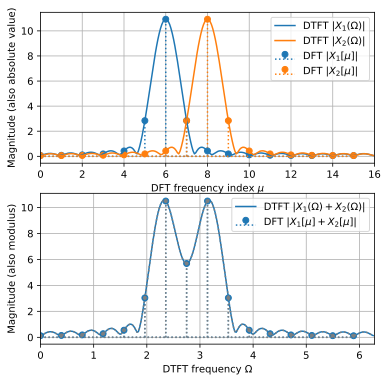

In [6]:
# signal & DFT parameter
N = 2**4
k, mu = np.arange(N), np.arange(N)

# window
w = kaiser(N, beta=3, sym=False)  # beta = 0 is rect window

# superposition of 2 complex exponential signals
# with non-rectangular windowing to reduce leakage effect
mu1, mu2 = 6, 8
x1, x2 = 1*w*np.exp(1j * 2*np.pi/N * k*mu1), 1*w*np.exp(1j * 2*np.pi/N * k*mu2)

plot_dft_dtft()
# with this window and window parametrization we are able to reduce the
# leakage effect, the two mainlobes are separated, but the valley between
# the two mainlobes has comparably large amplitude, it would be nice to have
# the two mainlobes better separated. We can do this by decreasing beta.
# Question: to what price?

# play around with beta = 0...3 and check the mainlobe width and sidelobe height
# ensure that beta=0 is identical with the rect window (this is a nice feature
# of the Kaiser-Bessel window)
# we can apply amplitude 0 to one of the signals just to see the spectrum
# of a single signal

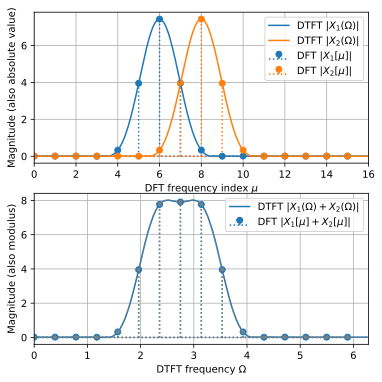

In [7]:
# signal & DFT parameter
N = 2**4
k, mu = np.arange(N), np.arange(N)

# window
w = kaiser(N, beta=7, sym=False)  # beta = 0 is rect window

# superposition of 2 complex exponential signals
# with non-rectangular windowing to reduce leakage effect
mu1, mu2 = 6, 8
x1, x2 = 1*w*np.exp(1j * 2*np.pi/N * k*mu1), 1*w*np.exp(1j * 2*np.pi/N * k*mu2)

plot_dft_dtft()
# with this window and window parametrization we are able to reduce the
# leakage effect even more, however now we broadend the two mainlobes in the
# upper plot
# such that they smear to one single mainlobe in the lower picture
# again this is always the general trade-off of windowing:
# broader mainlobe == smaller sidelobes but at a price of less frequency
# sensitivity 

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises